In [151]:
from bs4 import BeautifulSoup
from bs4.element import Comment
import re
import pandas as pd
import numpy as np
import nltk
import html5lib
import glob
import codecs
import os
import cltk
from cltk.tokenize.word import  WordTokenizer

In [152]:
print ("The current working directory is", os.getcwd())

The current working directory is /Users/mateomontoya/Desktop/work/projects_ongoing/flaubert2


In [153]:
DATA_DIR = 'data'
flaubert_fname = 'parsed.csv'
flaubert_fname = os.path.join(DATA_DIR, flaubert_fname)

In [154]:
flaubert_data = pd.read_csv(flaubert_fname)
len(flaubert_data)

4494

In [155]:
flaubert_data.head()

,chapter,folio,margins,margins_no_struck,margins_struck,metadata,previous,previous_no_struck,previous_struck,struck,text,underlined,version
0,NaN,NaN,NaN,NaN,NaN,NaN,Madame Bovary ____________ 19 7bre 1851.,Madame Bovary ____________ 19 7bre 1851.,NaN,NaN,Madame Bovary ____________ 19 7bre 1851.,NaN,1
1,NaN,2v,NaN,NaN,NaN,"I, chap 7 : La levrette Djali - brouillons, vo...",à Dieppe entendre des chanteurs Montagnards,à Dieppe entendre des chanteurs Montagnards,NaN,NaN,à Dieppe entendre des chanteurs Montagnards,NaN,1
2,1.0,3,allait puis cela en dôme tendu à 2 1 c'était d...,allait puis cela en dôme tendu à 2 1 c'était d...,ement lâche qu'il présenta au maître d'études ...,"I, chap. 1 : L'entrée de Charles au collège : ...",Madame Bovary. I. Une heure trois et demie ven...,Madame Bovary. I. Une heure et demie venaient ...,trois et le maître d'études attendait le petit...,ement lâche trois et le maître d'études attend...,allait puis cela en dôme tendu à 2 1 c'était d...,des moyens nouveau nouveau,1
3,1.0,3v,ce fut un vacarme suprême. on comme un flot dé...,ce fut un vacarme suprême. comme un flot débor...,"on puis com par peut à m alors, comme une band...","I, 1 : L'entrée de Charles au collège - Brouil...",- ce fut un vacarme suprême - les rires ... et...,- ce fut un vacarme suprême - les rires ... et...,comme veut prendre laissé un on allait ce s*/r...,"on puis com par par peut à m alors, comme une ...",ce fut un vacarme suprême. on comme un flot dé...,NaN,1
4,1.0,4,de Rouen des moyens comme toujours ainsi que d...,de Rouen ainsi que d'usage chacun Mr Roger der...,"des moyens comme toujours ""Mr Roger fort envir...","I, 1 : L'entrée de Charles au collège - Brouil...",Madame Bovary I. de Rouen Une heure et demie v...,Madame Bovary I. Une heure et demie venaient d...,de Rouen comme toujours Mr Roger l'étude des j...,de Rouen de des moyens comme toujours comme to...,Madame Bovary I. de Rouen Une heure et demie v...,des moyens nouveau et et le nouveau,1


In [156]:
flaubert_data.describe(include='O')

,folio,margins,margins_no_struck,margins_struck,metadata,previous,previous_no_struck,previous_struck,struck,text,underlined,version
count,4371,4317,4252,3742,4493,4484,4484,4323,4346,4484,2833,4494
unique,838,4203,4179,3627,4430,4437,4436,4232,4265,4435,2570,8
top,250,,tout,&,"II, chap. 8 : Rodolphe se moque des campagnard...",Qu'il me soit permis avant de vous entretenir ...,266 il marchait légèrement sourire aux lèvres ...,i,l,"269 pas Cependant entre les deux rangées, des ...",dans,6
freq,10,52,4,8,3,3,3,13,9,3,14,640


In [157]:
flaubert_data_cleaned = flaubert_data[flaubert_data['text'].notna() == True]

In [158]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()
sparse_dtm = countvec.fit_transform(flaubert_data_cleaned['text'])

In [159]:
sparse_dtm

<4484x33659 sparse matrix of type '<class 'numpy.int64'>'
	with 871241 stored elements in Compressed Sparse Row format>

In [161]:

dtm = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names(), index=flaubert_data_cleaned.index)
dtm['version'] = flaubert_data_cleaned['version']


4484

In [80]:
dtm.sum().sort_values(ascending=False).head(10)

de      60149
la      42179
il      35495
le      30434
elle    29583
les     27821
et      26857
en      23862
un      23360
des     20103
dtype: int64

In [81]:
dtm.mean().sort_values(ascending=False).head()

de      13.414139
la       9.406557
il       7.915923
le       6.787244
elle     6.597458
dtype: float64

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [164]:
tfidfvec = TfidfVectorizer()
sparse_tfidf = tfidfvec.fit_transform(flaubert_data_cleaned['text'])
sparse_tfidf

<4484x33659 sparse matrix of type '<class 'numpy.float64'>'
	with 871241 stored elements in Compressed Sparse Row format>

In [165]:
tfidf = pd.DataFrame(sparse_tfidf.toarray(), columns=tfidfvec.get_feature_names(), index=flaubert_data_cleaned.index)
tfidf.head()

,00,000,05,070,10,100,1000,100fr,100v,101,...,ôte,ôter,ôté,ôtée,ûla,ût,ηναυρμε,ψdans,ψet,ψtu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
tfidf['version'] = flaubert_data_cleaned['version']

In [168]:
version_1 = tfidf[tfidf['version'] == '1']
version_2 = tfidf[tfidf['version'] == '2']
version_3 = tfidf[tfidf['version'] == '3']
version_4 = tfidf[tfidf['version'] == '4']
version_5 = tfidf[tfidf['version'] == '5']
version_6 = tfidf[tfidf['version'] == '6']
version_C = tfidf[tfidf['version'] == 'C']
version_D = tfidf[tfidf['version'] == 'D']

Below we are looking at the highest TF-IDF value for each edited version of Madame Bovary -- these are the most unique words of each work.

In [177]:
version_1.max(numeric_only=True).sort_values(ascending=False).head(10)

montagnards     0.636493
chanteurs       0.556231
1851            0.545226
____________    0.519860
efflanqué       0.486845
silencieuses    0.486797
planant         0.472511
nastasie        0.458772
saillant        0.457385
rapides         0.455579
dtype: float64

In [178]:
version_2.max(numeric_only=True).sort_values(ascending=False).head(10)

riboudet        0.463505
étroits         0.458599
incessamment    0.458369
épais           0.430157
origine         0.417460
aime            0.415095
fente           0.413572
diaphane        0.395969
définitif       0.390146
supposait       0.374418
dtype: float64

In [179]:
version_3.max(numeric_only=True).sort_values(ascending=False).head(10)

illis          0.591319
revinrent      0.555216
fr             0.540222
nous           0.520979
lisait         0.518452
agriculteur    0.452805
elle           0.452604
vous           0.450724
on             0.448036
100            0.438062
dtype: float64

In [180]:
version_4.max(numeric_only=True).sort_values(ascending=False).head(10)

tendon        0.579155
trône         0.526892
tu            0.509264
illis         0.478728
flacon        0.434136
bouleversé    0.420514
elle          0.417635
union         0.408990
sangsues      0.403448
fr            0.390946
dtype: float64

In [181]:
version_5.max(numeric_only=True).sort_values(ascending=False).head(10)

enlever     0.502857
vous        0.449080
fr          0.437596
tu          0.425072
294         0.411333
lenteurs    0.403337
ils         0.403239
bouquet     0.381294
st          0.355622
pilon       0.354686
dtype: float64

In [182]:
version_6.max(numeric_only=True).sort_values(ascending=False).head(10)

tu          0.506936
lisez       0.482840
vous        0.455027
cercueil    0.412646
il          0.403007
apaisés     0.379614
elle        0.362250
aurais      0.338854
de          0.330487
bridoux     0.329942
dtype: float64

In [183]:
version_C.max(numeric_only=True).sort_values(ascending=False).head(10)

lisez          0.513933
tu             0.510527
riboudet       0.414357
cours          0.400318
vous           0.393823
adieu          0.382066
agriculteur    0.367737
marquis        0.365759
vestes         0.361081
collection     0.359121
dtype: float64

In [184]:
version_D.max(numeric_only=True).sort_values(ascending=False).head(10)

adieu        0.435808
vous         0.428876
cours        0.412135
marquis      0.394885
lisez        0.382330
tu           0.373595
bridoux      0.364769
de           0.362419
riboudet     0.362349
concluait    0.360276
dtype: float64

## Analyzing TF-IDF Matrix by collected Text of each Version

In [132]:
def flaubert_combine_versions_on_text(data):
    versions = ['1', '2', '3', '4', '5', '6', 'C', 'D']
    
    def remove_digits(txt):
        return ''.join([ch for ch in txt if not ch.isdigit()])
    
    data['text'] = data['text'].dropna()

    version_1 = data[data['version'] == '1']
    version_2 = data[data['version'] == '2']
    version_3 = data[data['version'] == '3']
    version_4 = data[data['version'] == '4']
    version_5 = data[data['version'] == '5']
    version_6 = data[data['version'] == '6']
    version_C = data[data['version'] == 'C']
    version_D = data[data['version'] == 'D']
    
     #version 1
    version_1 = ' '.join([str(x) for x in version_1.text])
    print(version_1[:1000])
    version_2 = ' '.join([str(x) for x in version_2.text])
    version_3 = ' '.join([str(x) for x in version_3.text])
    version_4 = ' '.join([str(x) for x in version_4.text])
    version_5 = ' '.join([str(x) for x in version_5.text])
    version_6 = ' '.join([str(x) for x in version_6.text])
    version_C = ' '.join([str(x) for x in version_C.text])
    version_D = ' '.join([str(x) for x in version_D.text])
    
    data = {'version': versions,
        'text': [version_1, version_2, version_3, version_4, version_5, version_6, version_C, version_D]}
    
    return pd.DataFrame(data=data)
    
    

In [133]:
flaubert_version = flaubert_combine_versions_on_text(flaubert_data)
flaubert_version.head()

Madame Bovary ____________ 19 7bre 1851. à Dieppe entendre des chanteurs Montagnards allait puis cela en dôme tendu à 2 1 c'était dur et côtelés régulièrement mou propre comme un melon – lâche et abandonné à son poids suivait partait ensuite une façon de sac qui se terminait par un polygone cartonné couvert d'une broderie en soutache compliquée et d'où pendait à distance au bout d'un long cordon trop mince un petit croisillon de fils d'or en manière de gland. Madame Bovary. I. à l'horloge Une heure trois et demie venaient de sonner / et le maître du collège d'études attendait le petit coup d'avant le quart se préparant déjà à faire réciter les leçons / quand le proviseur entra dans l'étude des moyens suivi d'un jeune garçon d'environ quinze ans et d'un dom garçon de classe qui portait un grand pupitre. il était suivi d'un nouveau habillé en bourgeois qu'il présenta au maître d'études en lui disant & d'un garçon de classe qui portait un gd pupitre. {{il y eut. tout le monde se leva comm

,version,text
0,1,Madame Bovary ____________ 19 7bre 1851. à Die...
1,2,Blainville- Crevon Buchy Quincampoix la Boissi...
2,3,259 tout lui parut être autour d'elle envelopp...
3,4,"296 [[ elle avait peur d'en perdre qque chose,..."
4,5,III ( II ) Lestiboudois Hippolyte doit paraîtr...


In [134]:
countvec = CountVectorizer()
sparse_dtm = countvec.fit_transform(flaubert_version['text'])

In [137]:
dtm_version = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names(), index=flaubert_version.index)
dtm_version.head()

,00,000,05,070,10,100,1000,100fr,100v,101,...,ôte,ôter,ôté,ôtée,ûla,ût,ηναυρμε,ψdans,ψet,ψtu
0,1,1,1,0,5,8,0,0,0,6,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,3,1,0,0,1,0,...,0,3,0,0,0,0,0,0,1,0
2,0,0,0,0,2,10,0,2,0,0,...,0,1,0,0,1,0,1,0,0,0
3,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,6,0,1,8,4,1,1,0,0,...,0,0,1,5,0,1,0,1,1,0


In [138]:
dtm_version.sum().sort_values(ascending=False).head(10)

de      60149
la      42179
il      35495
le      30434
elle    29583
les     27821
et      26857
en      23862
un      23360
des     20103
dtype: int64

In [140]:
dtm_version.mean().sort_values(ascending=False).head(10)

de      7518.625
la      5272.375
il      4436.875
le      3804.250
elle    3697.875
les     3477.625
et      3357.125
en      2982.750
un      2920.000
des     2512.875
dtype: float64

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [400]:
tfidfvec = TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 2))
sparse_tfidf = tfidfvec.fit_transform(flaubert_version['text'])
sparse_tfidf

<8x453626 sparse matrix of type '<class 'numpy.float64'>'
	with 677606 stored elements in Compressed Sparse Row format>

In [401]:
tfidf = pd.DataFrame(sparse_tfidf.toarray(), columns=tfidfvec.get_feature_names(), index=flaubert_version.index)
tfidf

,00,00 15,00 250,000,000 100,000 fr,000 kil,000 kilog,000 lieu,000 sacrifice,...,ût plus,ηναυρμε,ηναυρμε pardon,ψdans,ψdans allées,ψet,ψet air,ψet effet,ψtu,ψtu banquier
0,0.000618,0.000737,0.000000,0.000467,0.000737,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000633,0.000000,0.000756,0.000479,0.000000,0.000633,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000633,0.000756,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000723,0.000723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.002781,0.000000,0.001838,0.000731,0.000731,0.000731,0.000000,...,0.000731,0.000000,0.000000,0.000731,0.000731,0.000613,0.000000,0.000731,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000607,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000607,0.000607
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [402]:
tfidf.max().sort_values(ascending=False).head(100)

pr               0.371212
plus             0.369122
illis            0.285389
bien             0.243254
emma             0.222109
puis             0.218042
mr               0.194141
charles          0.192571
léon             0.186457
dit              0.154511
rodolphe         0.139828
ainsi            0.135166
bovary           0.128948
homais           0.121754
cependant        0.119605
rien             0.117874
qq               0.115168
temps            0.112453
toute            0.108037
ah               0.106604
quelque          0.106226
après            0.103621
toujours         0.101676
dont             0.100089
autres           0.092323
faisait          0.091846
toutes           0.090194
coup             0.089739
tête             0.089270
enfin            0.089012
                   ...   
oui              0.059224
ensuite          0.059170
suisse           0.059061
père             0.058581
mme              0.058510
tant             0.057239
monde            0.055638
côté        

Wants to work with Balzac and LaMartine -- style he is rebelling against and rejecting. But one of the characters is out of romantic poetry so he is mimicking that style. 

Naddaff is writing about the first exchanges of letters -- not writing Bovary but a different book -- letters are the basis of particular scenes in Bovary -- literal experiences are translated. Is the style he's using in the letters similar or different to Bovary? Developing the voice of one of his characters in the letters.

Also, looking at Colet's (his lovers) poetry at that moment.

Look at: "Ce qui est dans la coeur des femmes"

"Fleurs du midi"

"Penserosa"

"Charlotte Corday"

"La Jeunesse Mirabeau"

*Poesie Completes*

ARTFL -- 

In [186]:
from sklearn.decomposition import LatentDirichletAllocation

In [188]:
from stop_words import get_stop_words

stop_words = get_stop_words('fr')

In [191]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.80, min_df=0.50,
                                   stop_words=stop_words)
tfidf = tfidf_vectorizer.fit_transform(flaubert_version['text'])

In [194]:
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=0.50,
                                stop_words=stop_words
                                )
tf = tf_vectorizer.fit_transform(flaubert_version['text'])

## Analyzing Topics with Latent Dirichlet Allocation

In [403]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
lda = LatentDirichletAllocation(max_iter=20, n_components=8)
lda = lda.fit(tf)

In [404]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #{}:".format(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [405]:
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, 20)


Topic #0:
romaine entreferma propager étirait débitant liqueur détesta tensions puant pre cuit épaississait luxueuses écarquillant pendantes capote qfois habituelle ble moralisation

Topic #1:
canivet lucie opération fr abricots mécanique chérir av tonneau évanouir lagardy acide machine loge convalescence terrible pistolets écouta edgar cataplasmes

Topic #2:
romaine entreferma propager étirait débitant liqueur détesta tensions puant pre cuit épaississait luxueuses écarquillant pendantes capote qfois habituelle ble moralisation

Topic #3:
canivet vinçart rolet larivière rouault cierges caron recula bridoux catastrophe camarades frappa mensonge chirurgien bourgogne suivit sauta sanglottait arriéré émétique

Topic #4:
boulanger président estrade mairie fr animaux médaille lampions agriculture multitude préfet engrais culture bestiaux cultivateurs tente industrie oserays pré poursuivit

Topic #5:
fr chapelle procuration boulevard succession voici tombeaux portail tilbury timidité balcon 

In [406]:
topic_dist = lda.transform(tf)
topic_dist

array([[8.72724170e-06, 8.73569571e-06, 8.72724170e-06, 8.73566690e-06,
        8.73615678e-06, 8.73560047e-06, 8.73739079e-06, 9.99938865e-01],
       [1.05645942e-05, 1.05738894e-05, 1.05645942e-05, 1.05751189e-05,
        1.05760696e-05, 1.05737939e-05, 9.99925995e-01, 1.05771857e-05],
       [9.28748468e-06, 9.29611227e-06, 9.28748468e-06, 9.29565455e-06,
        9.99934945e-01, 9.29463448e-06, 9.29770560e-06, 9.29561660e-06],
       [8.58990428e-06, 9.99939826e-01, 8.58990428e-06, 8.59857140e-06,
        8.59925406e-06, 8.59894658e-06, 8.59819116e-06, 8.59898901e-06],
       [8.99476717e-06, 9.00511143e-06, 8.99476717e-06, 9.00321396e-06,
        9.00275610e-06, 9.99936993e-01, 9.00305473e-06, 9.00306704e-06],
       [7.47386539e-06, 1.20474743e-01, 7.47386539e-06, 7.35036201e-01,
        7.48315197e-06, 1.44451660e-01, 7.48135950e-06, 7.48366156e-06],
       [1.21430469e-05, 2.12091034e-01, 1.21430469e-05, 1.63365927e-01,
        1.16565916e-01, 1.53358240e-01, 1.42500181e-01, 2.

In [407]:
topic_dist_df = pd.DataFrame(topic_dist)
df_w_topics = topic_dist_df.join(flaubert_version).drop(columns='text')
df_w_topics

,0,1,2,3,4,5,6,7,version
0,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,0.999939,1
1,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.999926,0.000011,2
2,0.000009,0.000009,0.000009,0.000009,0.999935,0.000009,0.000009,0.000009,3
3,0.000009,0.999940,0.000009,0.000009,0.000009,0.000009,0.000009,0.000009,4
4,0.000009,0.000009,0.000009,0.000009,0.000009,0.999937,0.000009,0.000009,5
5,0.000007,0.120475,0.000007,0.735036,0.000007,0.144452,0.000007,0.000007,6
6,0.000012,0.212091,0.000012,0.163366,0.116566,0.153358,0.142500,0.212094,C
7,0.000010,0.205870,0.000010,0.149176,0.107416,0.148243,0.149866,0.239408,D


In [408]:
import seaborn as sns
import matplotlib.pyplot as plt

In [409]:
melt = df_w_topics.melt('version', var_name='cols', value_name='vals')
melt.head()

,version,cols,vals
0,1,0,0.000009
1,2,0,0.000011
2,3,0,0.000009
3,4,0,0.000009
4,5,0,0.000009


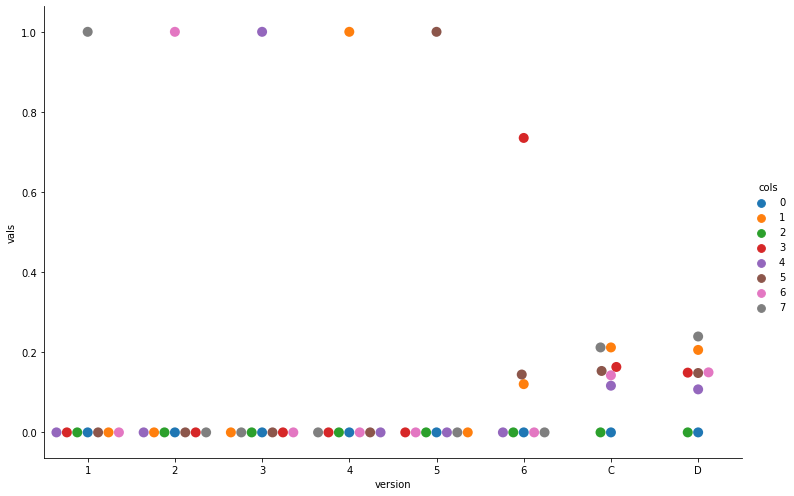

In [410]:
sns.catplot(x='version', y='vals', hue='cols', data=melt, kind='swarm', height=7, aspect=1.5, s=10);